在银行借贷场景中，评分卡是一种以分数形式来衡量一个客户的信用风险大小的手段，它衡量向别人借钱的人(受信人，需要融资的公司)不能如期履行合同中的还本付息责任，并让借钱给别人的人(授信人，银行等金融机构)造成经济损失的可能性。一般来说，评分卡打出的分数越高，客户的信用越好，风险越小。

这些”借钱的人“，可能是个人，有可能是有需求的公司和企业。对于企业来说，一般按照融资主体的融资用途，分 别使用企业融资模型，现金流融资模型，项目融资模型等模型。而对于个人来说，有”四张卡“来评判个人的信 用程度:A卡，B卡，C卡和F卡。而众人常说的“评分卡”其实是指A卡，又称为申请者评级模型，主要应用于相关融 资类业务中新用户的主体评级，即判断金融机构是否应该借钱给一个新用户，如果这个人的风险太高，可以拒绝贷款。

获取数据——数据清洗——特征工程——模型开发——模型检验与评估——模型上线——监测与报告

注意：评分卡是典型的不平衡样本场景

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [35]:
 data = pd.read_csv("./rankingcard.csv",index_col=0)

In [36]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [37]:
data.shape

(150000, 11)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [39]:
#去除重复值 
data.drop_duplicates(inplace=True)
data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [40]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [41]:
#恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [42]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [43]:
#探索缺失值
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [44]:
data["NumberOfDependents"].value_counts()

0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [45]:
#对于NumberOfDependents（家属人数），缺失值比较少，可以用均值填补
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True) 
data.info()
data.isnull().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [46]:
#考虑MonthlyIncome
# 与业务沟通，考虑不填收入的人的收入均值（优先）
# 尝试使用随机森林填补缺失值

def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数:
    X:要填补的特征矩阵 
    y:完整的，没有缺失值的标签 
    to_fill:字符串，要填补的那一列的名称 
    """
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #重新构建训练集和测试集
    Ytrain = fill[fill.notnull()] 
    Ytest = fill[fill.isnull()] 
    Xtrain = df.iloc[Ytrain.index,:] 
    Xtest = df.iloc[Ytest.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr 
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    print(Xtest)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [47]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
print(X.shape)
y_pred = fill_missing_rf(X,y,"MonthlyIncome")
#确将数据覆盖 
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

(149391, 10)
        RevolvingUtilizationOfUnsecuredLines  age  \
6                                   0.305682   57   
8                                   0.116951   27   
16                                  0.061086   78   
32                                  0.083418   62   
41                                  0.072898   81   
52                                  1.000000   62   
58                                  0.541109   43   
62                                  0.101156   72   
71                                  0.142013   67   
86                                  0.360510   58   
92                                  0.784836   52   
96                                  0.542243   48   
100                                 0.013025   61   
109                                 0.041258   61   
115                                 0.007508   74   
118                                 0.007521   68   
124                                 0.277957   39   
130                              

In [54]:
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### 处理异常值
现实数据永远都会有一些异常值，首先捕捉出来，然后观察性质。注意，我们并不是要排除掉所有异常值，相反很多时候，异常值是重点研究对象

在银行数据中，希望排除的“异常值”不是一些超高或超低的数字，而是 一些不符合常理的数据:比如，收入不能为负数，但是一个超高水平的收入却是合理的，可以存在的。所以在银行业中，往往就使用普通的描述性统计来观察数据的异常与否与数据的分布情况。


In [57]:
#描述性统计 
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5425.244598,13249.003907,0.0,0.0,0.170000,1800.000000,4419.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [58]:
(data["age"] == 0).sum()

1

In [59]:
data = data[data["age"] != 0]

In [60]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [61]:
#有225个样本存在这样的情况，并且这些样本，标签并不都是1，他们并不都是坏客户。因此，可以判断，这些样本是某种异常，应该把它们删除。

data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90] #恢复索引
data.index = range(data.shape[0])
data.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [62]:
#描述性统计 
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.0,0.003174,0.030033,0.153615,0.553698,0.97502,1.094061,50708.0
age,149165.0,52.331076,14.714114,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.00000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.0,0.036385,0.178211,0.368619,0.876994,1277.30000,4989.360000,329664.0
MonthlyIncome,149165.0,5429.147800,13258.020708,0.0,0.0,0.170000,1800.000000,4433.000000,7417.000000,10800.00000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,1.0,3.000000,5.000000,8.000000,11.000000,15.00000,24.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.00000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,11.0


### 是否做标准化
在描述性统计结果中，可以观察到数据量纲明显不统一，而且存在一部分极偏的分布，虽然逻辑回归对于数据没有分布要求，但是如果数据服从正态分布的话梯度下降可以收敛得更快。但在这里，我们不对数据进行标准化处理，也不进行量纲统一，为什么?

无论算法有什么样的规定，无论统计学中有什么样的要求，我们的最终目的都是要为业务服务。现在我们要制作评分卡，评分卡是要给业务人员们使用的基于新客户填写的各种信息为客户打分的一张卡片，而为了制作这张卡片， 我们需要对我们的数据进行一个“分档”，比如说，年龄20~30岁为一档，年龄30~50岁为一档，月收入1W以上为一 档，5000~1W为一档，每档的分数不同。

一旦我们将数据统一量纲，或者标准化了之后，数据大小和范围都会改变，统计结果是漂亮了，但是对于业务人员 来说，他们完全无法理解，标准化后的年龄在0.00328~0.00467之间为一档是什么含义。并且，新客户填写的信 息，天生就是量纲不统一的，我们的确可以将所有的信息录入之后，统一进行标准化，然后导入算法计算，但是最 终落到业务人员手上去判断的时候，他们会完全不理解为什么录入的信息变成了一串统计上很美但实际上根本看不 懂的数字。由于业务要求，在制作评分卡的时候，尽量保持数据的原貌，年龄就是8~110的数字，收入就是 大于0，最大值可以无限的数字，即便量纲不统一，我们也不对数据进行标准化处理。

### 样本不均衡问题

In [63]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [64]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数:{}; 1占{:.2%}; 0占 {:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数:149165; 1占6.62%; 0占 93.38%


In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X,y = sm.fit_sample(X,y)
n_sample_ = X.shape[0]
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数:{}; 1占{:.2%}; 0占 {:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

ModuleNotFoundError: No module named 'imblearn'

In [81]:
#分训练集和测试集
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.DataFrame(y)
X_train,X_test,y_train,y_test = train_test_split(X,y)

model_data = pd.concat([y_train,X_train], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

test_data = pd.concat([y_test,X_test], axis=1)
test_data.index = range(test_data.shape[0])
test_data.columns = data.columns

model_data.to_csv('./model_data.csv')
test_data.to_csv('./test_data.csv')



## 分箱
制作评分卡，是要给各个特征进行分档，以便业务人员能够根据新客户填写的信息为客户打分。因此在评分卡制作过程中，一个重要的步骤就是分箱。分箱的本质，其实就是离散化连续变量，好让拥有不同属性的人被分成不同的类别(打上不同的分数)，其实本质比较类似于聚类。那在分箱中要考虑几个问题:
### 分多少个箱子合适
IV并非越大越好，需要找到IV的大小和箱子个数的平衡点。所以，对特征进行分箱，然后计算每个特征在每个箱子数目下的WOE值，利用IV值的曲线，找出合适的分箱个数。
### 分箱要达成什么样的效果
希望不同属性的人有不同的分数，因此希望在同一个箱子内的人的属性是尽量相似的，而不同箱子的人的 属性是尽量不同的，即”组间差异大，组内差异小“。对于评分卡来说，就是说希望一个箱子内的人违约概率是类似的，而不同箱子的人的违约概率差距很大，即WOE差距要大，并且每个箱子中坏客户所占的比重也要不同。那么，可以使用卡方检验来对比两个箱子之间的相似性，如果两个箱子之间卡方检验的P值很 大，则说明他们非常相似，那就可以将这两个箱子合并为一个箱子。
### 步骤如下：
1. 把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组
2. 确保每一组中都要包含两种类别的样本，否则IV值会无法计算
3. 对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止
4. 让一个特征分别分成[2,3,4.....20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数
5. 分箱完毕后，计算每个箱的WOE值，观察分箱效果
6. 这些步骤都完成后，可以对各个特征都进行分箱，然后观察每个特征的IV值，以此来挑选特征。（可选）

In [107]:
model_data["qcut"], updown = pd.qcut(model_data['NumberOfOpenCreditLinesAndLoans'], retbins=True, q = 20)

In [108]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,1,1.000000,49.321016,0.0,98.796767,16.512517,1.101617,0.0,0.0,0.0,0.0,"(-0.001, 1.621]"
1,0,0.383960,60.000000,0.0,0.111378,7083.000000,3.000000,0.0,0.0,0.0,0.0,"(2.539, 3.026]"
2,0,0.221969,50.000000,0.0,0.476291,6600.000000,7.000000,0.0,1.0,0.0,2.0,"(6.0, 7.0]"
3,0,0.007258,50.000000,0.0,0.500333,1500.000000,10.000000,0.0,1.0,0.0,0.0,"(9.091, 10.0]"
4,1,0.973339,61.000000,1.0,0.209962,5500.000000,11.000000,0.0,0.0,1.0,1.0,"(10.0, 11.0]"


In [109]:
updown

array([ 0.        ,  1.62097962,  2.53944386,  3.02635627,  4.        ,
        4.63814721,  5.        ,  5.95259676,  6.        ,  7.        ,
        7.23980849,  8.        ,  8.8699736 ,  9.09090384, 10.        ,
       11.        , 12.        , 13.        , 15.        , 17.08765841,
       58.        ])

In [110]:
# 统计每个分箱中0和1的数量
count_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs']
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数 
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]
#注意zip会按照最短列来进行结合 
num_bins

[(0.0, 1.6209796224815098, 3651, 6796),
 (1.6209796224815098, 2.539443857616814, 4493, 5954),
 (2.539443857616814, 3.026356267976387, 6296, 4151),
 (3.026356267976387, 4.0, 8171, 8239),
 (4.0, 4.638147205680022, 0, 4484),
 (4.638147205680022, 5.0, 9069, 4553),
 (5.0, 5.952596757630844, 0, 7271),
 (5.952596757630844, 6.0, 9647, 1839),
 (6.0, 7.0, 9347, 8845),
 (7.0, 7.239808489014238, 0, 1663),
 (7.239808489014238, 8.0, 9036, 6285),
 (8.0, 8.869973598697268, 0, 5573),
 (8.869973598697268, 9.090903841999621, 7947, 2500),
 (9.090903841999621, 10.0, 6795, 6441),
 (10.0, 11.0, 5890, 5989),
 (11.0, 12.0, 4942, 4943),
 (12.0, 13.0, 4047, 4012),
 (13.0, 15.0, 5682, 6313),
 (15.0, 17.087658412350866, 3803, 3824),
 (17.087658412350866, 58.0, 5792, 4655)]

In [117]:
num_bins[0][2:]

(3651, 6796)

In [122]:
#确保每个箱中都有0和1样本
for i in range(20):
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2] + num_bins[1][2],
            num_bins[0][3] + num_bins[1][3]
        )]
        continue
        #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并 
        #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并 
        #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2] + num_bins[i][2],
                num_bins[i-1][3] + num_bins[i][3]
            )]
            break
    else:
        break

In [123]:
num_bins

[(0.0, 1.6209796224815098, 3651, 6796),
 (1.6209796224815098, 2.539443857616814, 4493, 5954),
 (2.539443857616814, 3.026356267976387, 6296, 4151),
 (3.026356267976387, 4.638147205680022, 8171, 12723),
 (4.638147205680022, 5.952596757630844, 9069, 11824),
 (5.952596757630844, 6.0, 9647, 1839),
 (6.0, 7.239808489014238, 9347, 10508),
 (7.239808489014238, 8.869973598697268, 9036, 11858),
 (8.869973598697268, 9.090903841999621, 7947, 2500),
 (9.090903841999621, 10.0, 6795, 6441),
 (10.0, 11.0, 5890, 5989),
 (11.0, 12.0, 4942, 4943),
 (12.0, 13.0, 4047, 4012),
 (13.0, 15.0, 5682, 6313),
 (15.0, 17.087658412350866, 3803, 3824),
 (17.087658412350866, 58.0, 5792, 4655)]

In [112]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total) #而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
# 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"] 
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1 #一个箱子中所有样本的总数
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

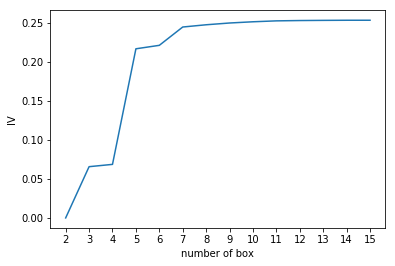

In [124]:
num_bins_ = num_bins.copy()
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
IV = []
axisx = []
while len(num_bins_) > 2:
    pvs = []
# 获取 num_bins_两两之间的卡方检验的置信度(或卡方值) 
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0] 
        pvs.append(pv)
# 通过 p 值进行处理。合并 p 值最大的两组 
    i = pvs.index(max(pvs)) 
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

In [44]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_



In [48]:
afterbins = get_bin(num_bins,6)
afterbins

[(21.0, 48.58780161847126, 42198, 62271),
 (48.58780161847126, 58.78193036300665, 25130, 27104),
 (58.78193036300665, 64.0, 14661, 8210),
 (64.0, 74.0, 14345, 5129),
 (74.0, 109.0, 8275, 1615)]

In [46]:
bins_df = get_woe(num_bins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.000000,36.715984,15777,26011,41788,0.200002,0.622451,0.150819,0.249317,-0.502647
1,36.715984,48.587802,26421,36260,62681,0.299998,0.578485,0.252569,0.347554,-0.319236
2,48.587802,58.781930,25130,27104,52234,0.249998,0.518896,0.240228,0.259794,-0.078299
3,58.781930,64.000000,14661,8210,22871,0.109463,0.358970,0.140150,0.078693,0.577158
4,64.000000,74.000000,14345,5129,19474,0.093205,0.263377,0.137130,0.049162,1.025811
5,74.000000,109.000000,8275,1615,9890,0.047335,0.163296,0.079104,0.015480,1.631224


In [99]:
len(num_bins)

5

In [125]:
#将选取最佳分箱个数的过程包装为函数
def graphforbestbin(DF,X,Y,n=5,q=20,graph=True):
    #自动最优分箱函数，基于卡方检验的分箱
    #参数：
    # DF:需要输入的数据 
    #X:需要分箱的列名 
    #Y:分箱数据对应的标签Y列名 
    #n:保留分箱个数 
    #q:初始分箱的个数 
    #graph:是否要画出IV图像
    #区间为前开后闭
    DF = DF[[X,Y]].copy()
    DF["qcut"], bins = pd.qcut(DF[X], retbins=True, q=q, duplicates="drop")
    if len(bins)<q:
        print("可用的分箱个数太少，无法自动分箱")
        return
    count_y0 = DF.loc[DF[Y] == 0].groupby(by="qcut").count()[Y]
    count_y1 = DF.loc[DF[Y] == 1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],count_y0,count_y1)]
    for i in range(q):
    #如果第一个组没有包含正样本或负样本，向后合并
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2] + num_bins[1][2],
                num_bins[0][3] + num_bins[1][3]
            )]
            continue
        #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并 
        #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并 
        #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2] + num_bins[i][2],
                    num_bins[i-1][3] + num_bins[i][3]
                )]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins, columns = columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            # 0 返回 chi2 值，1 返回 p 值。
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i: i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2] + num_bins[i+1][2],
            num_bins[i][3] +num_bins[i+1][3]
        )]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("Information Value")
        plt.show()
    return bins_df


In [126]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


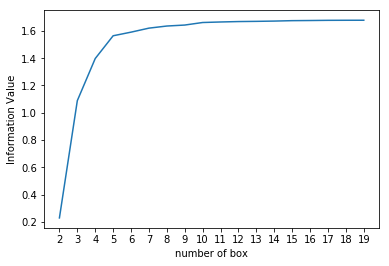

age


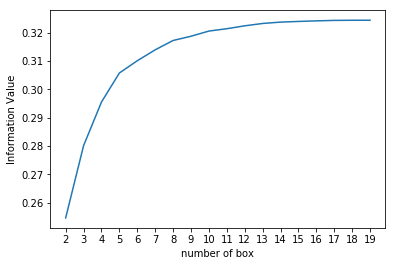

NumberOfTime30-59DaysPastDueNotWorse
可用的分箱个数太少，无法自动分箱
DebtRatio


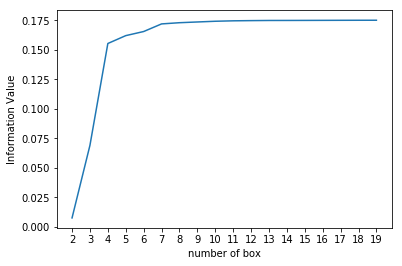

MonthlyIncome


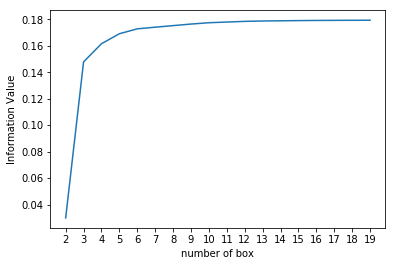

NumberOfOpenCreditLinesAndLoans


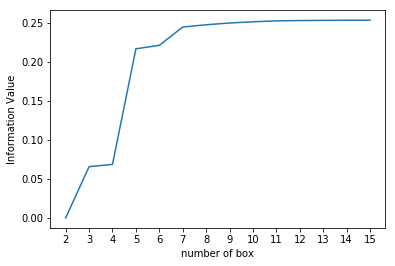

NumberOfTimes90DaysLate
可用的分箱个数太少，无法自动分箱
NumberRealEstateLoansOrLines
可用的分箱个数太少，无法自动分箱
NumberOfTime60-89DaysPastDueNotWorse
可用的分箱个数太少，无法自动分箱
NumberOfDependents
可用的分箱个数太少，无法自动分箱


In [127]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20,graph=True)

In [142]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                 "age":5,
                 "DebtRatio":4,
                 "MonthlyIncome":3,
                 "NumberOfOpenCreditLinesAndLoans":5}
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]}


In [143]:
hand_bins.items()

dict_items([('NumberOfTime30-59DaysPastDueNotWorse', [0, 1, 2, 13]), ('NumberOfTimes90DaysLate', [0, 1, 2, 17]), ('NumberRealEstateLoansOrLines', [0, 1, 2, 4, 54]), ('NumberOfTime60-89DaysPastDueNotWorse', [0, 1, 2, 8]), ('NumberOfDependents', [0, 1, 2, 3])])

In [144]:
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [145]:
bins_of_col = {}
#生成自动分箱的分箱区间和分箱后的IV值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col,"SeriousDlqin2yrs",n=auto_col_bins[col],q=20,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [146]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0607104206,
  0.22082134005000004,
  0.46525602651921316,
  0.9842208309868942,
  0.9999998999999999,
  inf],
 'age': [-inf, 48.55697421605335, 58.669335646328975, 64.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017886472800000004,
  0.3602774288,
  1.5175801069704538,
  inf],
 'MonthlyIncome': [-inf, 0.1, 5583.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf,
  5.952596757630844,
  6.0,
  8.869973598697268,
  9.090903841999621,
  inf]}

In [148]:
#合并手动分箱数据
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0607104206,
  0.22082134005000004,
  0.46525602651921316,
  0.9842208309868942,
  0.9999998999999999,
  inf],
 'age': [-inf, 48.55697421605335, 58.669335646328975, 64.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017886472800000004,
  0.3602774288,
  1.5175801069704538,
  inf],
 'MonthlyIncome': [-inf, 0.1, 5583.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf,
  5.952596757630844,
  6.0,
  8.869973598697268,
  9.090903841999621,
  inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [151]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe


In [152]:
#将所有特征的woe存储到字典中 
woe_all = {}
for col in bins_of_col:
    woe_all[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
woe_all

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0607]     2.471330
 (0.0607, 0.221]    1.065550
 (0.221, 0.465]     0.008762
 (0.465, 0.984]    -1.072094
 (0.984, 1.0]      -0.455820
 (1.0, inf]        -2.078254
 dtype: float64, 'age': cut
 (-inf, 48.557]     -0.388207
 (48.557, 58.669]   -0.084799
 (58.669, 64.0]      0.569746
 (64.0, 74.0]        1.037755
 (74.0, inf]         1.622456
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0179]    1.570797
 (0.0179, 0.36]    0.061279
 (0.36, 1.518]    -0.360439
 (1.518, inf]      0.174502
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]      1.464063
 (0.1, 5583.0]   -0.244241
 (5583.0, inf]    0.236514
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 5.953]   -0.271415
 (5.953, 6.0]     1.654764
 (6.0, 8.87]     -0.198777
 (8.87, 9.091]    1.153843
 (9.091, inf]     0.018508
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    1.100428
 (0.0, 1.0]    -1.393041
 (1.0, 2.0]    -2.041194
 (2.0, inf]

In [154]:
#用woe值替换原始数据
model_woe = pd.DataFrame(index=model_data.index)
#将原始数据分箱后，把woe映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woe_all["age"])
model_woe

,age
0,-0.084799
1,0.569746
2,-0.084799
3,-0.084799
4,0.569746
5,0.569746
6,-0.084799
7,-0.388207
8,1.037755
9,-0.084799


In [157]:
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woe_all[col])
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.084799,-0.455820,0.174502,-0.244241,-0.271415,1.100428,0.698487,0.211185,0.544583,0.626722,1
1,0.569746,0.008762,0.061279,0.236514,-0.271415,1.100428,0.698487,0.211185,0.544583,0.626722,0
2,-0.084799,0.008762,-0.360439,0.236514,-0.198777,1.100428,0.698487,-0.010743,0.544583,-0.520438,0
3,-0.084799,2.471330,-0.360439,-0.244241,0.018508,1.100428,0.698487,-0.010743,0.544583,0.626722,0
4,0.569746,-1.072094,0.061279,-0.244241,0.018508,-1.393041,0.698487,0.211185,-2.466342,-0.582728,1


In [160]:
#处理测试集
vali_woe = pd.DataFrame(index=test_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(test_data[col],bins_of_col[col]).map(woe_all[col])
vali_woe["SeriousDlqin2yrs"] = test_data["SeriousDlqin2yrs"]

In [162]:
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,1.065550,1.622456,0.061279,-0.244241,-0.198777,1.100428,0.698487,0.211185,0.544583,0.626722,0
1,0.008762,-0.084799,-0.360439,-0.244241,0.018508,-1.393041,0.698487,-0.010743,-2.466342,0.626722,1
2,-1.072094,-0.388207,-0.360439,-0.244241,0.018508,-2.041194,0.698487,-0.010743,0.544583,0.626722,1
3,2.471330,-0.084799,-0.360439,0.236514,0.018508,1.100428,0.698487,-0.808176,0.544583,0.626722,0
4,-1.072094,0.569746,-0.360439,0.236514,1.153843,-2.302843,-2.548495,-0.405503,-2.466342,-0.520438,1


In [164]:
train_X = model_woe.iloc[:,:-1]
train_y = model_woe.iloc[:,-1]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [165]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(train_X,train_y)
lr.score(vali_X,vali_y)

0.8640553657065733

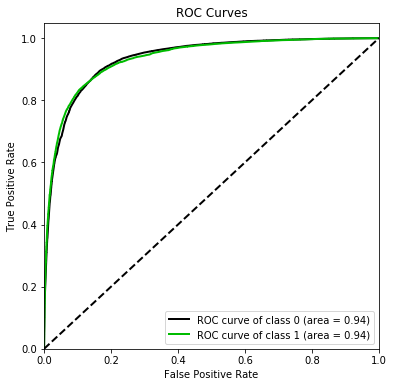

In [167]:
#roc 衡量模型判断一个特异类所付出的代价
import scikitplot as skplt
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                       plot_micro=False,figsize=(6,6),
                       plot_macro=False)

### 制作评分卡
$$Score = A - B * log(odds)$$
其中A与B是常数，A叫做“补偿”，B叫做“刻度”，两个常数可以通过两个假 设的分值带入公式求出，这两个假设分别是:
1. 某个特定的违约概率下的预期分值
2. 指定的违约概率翻倍的分数(PDO)

In [170]:
#假设对数几率为 时设定的特定分数为600，PDO=20，那么对数几率为1/30时的分数就是620。带入以上线性表达式，得到
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B,A

(28.85390081777927, 481.8621880878296)

In [171]:
base_score = A - B*lr.intercept_
base_score

array([481.37480316])

In [172]:
#一个特征下每个箱对应不同的分数
score_age = woe_all["age"] * (-B*lr.coef_[0][1])
score_age

cut
(-inf, 48.557]      -7.023019
(48.557, 58.669]    -1.534097
(58.669, 64.0]      10.307219
(64.0, 74.0]        18.773932
(74.0, inf]         29.351688
dtype: float64

In [179]:
train_X.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.084799,-0.455820,0.174502,-0.244241,-0.271415,1.100428,0.698487,0.211185,0.544583,0.626722
1,0.569746,0.008762,0.061279,0.236514,-0.271415,1.100428,0.698487,0.211185,0.544583,0.626722
2,-0.084799,0.008762,-0.360439,0.236514,-0.198777,1.100428,0.698487,-0.010743,0.544583,-0.520438
3,-0.084799,2.471330,-0.360439,-0.244241,0.018508,1.100428,0.698487,-0.010743,0.544583,0.626722
4,0.569746,-1.072094,0.061279,-0.244241,0.018508,-1.393041,0.698487,0.211185,-2.466342,-0.582728


In [180]:
file = "./ScoreData.csv"
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(train_X.columns):
    print(col)
    score = woe_all[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

age
RevolvingUtilizationOfUnsecuredLines
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents
